<a href="https://colab.research.google.com/github/RosemaryYool/Notes-for-AI-in-Science-and-Medicine/blob/main/Hand_Gesture_for_VC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Collection
---
Will use the webcam as a mode for users to generate their own data.

Define a specific hand gesture for each volume control action:

---

1. One finger up will be for turning the volume down.
2. Two fingers up will be for turning the volume up.

In [ ]:
from microdot import Microdot, Response

app = Microdot()
Response.default_content_type = 'text/html'

def htmldoc():
    doc = f'''
        <head>
            <meta charset="utf-8">
            <meta name="viewport" content="width=device-width, initial-scale=1">
            <title>Dashboard CSS - Demo</title>
            <link rel="stylesheet" href="https://williamedwardhahn.github.io/AI_Science_Medicine/dashboard.css">
        </head>
        <body>
            <header>
                <h1>Begin your study!</h1>
            </header>
            <nav>
                <input type="checkbox" id="nav-menu-btn" />
                <label for="nav-menu-btn"></label>
                <ul>
                    <li><a href="#">My Profile</a></li>
                    <li><a href="#">My Projects</a></li>
                    <li><a href="#">Color Selections</a></li>
                    <li><a href="#">System Calibration</a></li>
                </ul>
            </nav>
            <main class="container-fluid">
              <div class="row">

                <div class="col-xs-12 col-sm-6 col-md-3">
                  <div class="panel">
                    <header>
                      <h2>Temperature</h2>
                    </header>
                    <main>
                      <h3>23.5<sub>&deg;C</sub></h3>
                    </main>
                    <footer>
                      <time>2016_04_01 12:21 UTC</time>
                    </footer>
                  </div>
                </div>

                <div class="col-xs-12 col-sm-6 col-md-3">
                  <div class="panel">
                    <header>
                      <h2>M1 Position</h2>
                    </header>
                    <main>
                      <h3>14<sub>steps</sub></h3>
                    </main>
                    <footer>
                      <time>2016-04-01 12:21 UTC</time>
                    </footer>
                </div>
            </div>

        <div class="col-xs-12 col-sm-12 col-md-6">
          <div class="panel info">
            <header>
              <h2>Elapsed Time</h2>
            </header>
            <main>
              <h3>0:22:07.414</h3>
            </main>
            <footer>
              <time>2016-04-01 12:21 UTC</time>
            </footer>
          </div>
        </div>

      </div>

      <div class="row">

        <div class="col-xs-12 col-sm-12 col-md-6">
          <div class="panel double success">
            <header>
              <h2>Velocity Curves</h2>
            </header>
            <main>
              <img class="responsive" src="chart.svg" alt="Chart" />
            </main>
            <footer>
              <time>2016-04-01 12:21 UTC</time>
            </footer>
          </div>
        </div>

        <div class="col-xs-12 col-sm-12 col-md-6">
          <div class="panel double">
            <header>
              <h2>Motor Control</h2>
            </header>
            <main>
              <form>
                <div class="row">
                  <div class="col-md-3">
                    <label>Motor TL</label>
                    <input type="number" value="210" />
                  </div>
                  <div class="col-md-3">
                    <label>Motor TR</label>
                    <input type="number" value="0" />
                  </div>
                  <div class="col-md-3">
                    <label>Motor BL</label>
                    <input type="number" value="405" />
                  </div>
                  <div class="col-md-3">
                    <label>Motor BR</label>
                    <input type="number" value="313" />
                  </div>
                </div>
                <div class="row">
                  <div class="col-md-3">
                    <label>Trim TL</label>
                    <input type="number" value="14" />
                  </div>
                  <div class="col-md-3">
                    <label>Trim TR</label>
                    <input type="number" value="0" />
                  </div>
                  <div class="col-md-3">
                    <label>Trim BL</label>
                    <input type="number" value="0" />
                  </div>
                  <div class="col-md-3">
                    <label>Trim BR</label>
                    <input type="number" value="-10" />
                  </div>
                </div>

                <button class="info">Apply</button>
                <button class="warning">Execute</button>
                <button class="danger">Halt</button>
              </form>
            </main>
          </div>
        </div>

      </div>

    </main>
    <footer>
      <p>
        <small>
        MPCR Lab
        </small>
      </p>
    </footer>
  </body>
</html>
'''
    return doc


@app.route('/')
def serve_html(request):
    return htmldoc()

app.run(debug=True, port=8011)

# Data Preprocessing

In [106]:
from google.colab import files
uploaded = files.upload()

Saving hand_gesture.jpg to hand_gesture (3).jpg


In [107]:
from google.colab.patches import cv2_imshow
import os
import cv2
import numpy as np

In [108]:
# Load the image
image = cv2.imread('hand_gesture.jpg')

In [109]:
# Resize the image to 224x224 pixels
resized_image = cv2.resize(image, (224, 224))

In [110]:
# Convert the image to RGB
rgb_image = cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB)

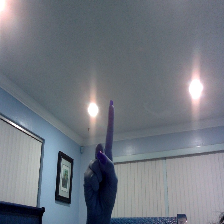

In [123]:
# Display the preprocessed image
cv2_imshow(rgb_image)

In [133]:
# Convert the preprocessed image to a PyTorch tensor
preprocessed_image_tensor = torch.from_numpy(rgb_image).unsqueeze(0).permute(0, 3, 1, 2).float()

In [134]:
# Define the label for the single image
label = torch.tensor([0])

In [135]:
# Create the TensorDataset
dataset = TensorDataset(preprocessed_image_tensor, label)

In [136]:
# Define the batch size and create the DataLoader
batch_size = 1
data_loader = DataLoader(dataset, batch_size=batch_size, shuffle=True)


# CNN Model Training

In [151]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader

In [152]:
class CNN(nn.Module):
        def __init__(self):
            super(CNN, self).__init__()
            self.conv1 = nn.Conv2d(3, 16, 3, padding=1)
            self.relu1 = nn.ReLU()
            self.pool1 = nn.MaxPool2d(2)
            self.conv2 = nn.Conv2d(16, 32, 3, padding=1)
            self.relu2 = nn.ReLU()
            self.pool2 = nn.MaxPool2d(2, padding=1)
            self.fc1 = nn.Linear(32 * 57 * 57, 128)
            self.relu3 = nn.ReLU()
            self.fc2 = nn.Linear(128, 10)

        def forward(self, x):
            x = self.conv1(x)
            x = self.relu1(x)
            x = self.pool1(x)
            x = self.conv2(x)
            x = self.relu2(x)
            x = self.pool2(x)
            x = x.view(x.size(0), -1)
            x = self.fc1(x)
            x = self.relu3(x)
            x = self.fc2(x)
            return x

In [153]:
# Call the model before running through the training loop:
model = CNN()

In [154]:
# Define loss function:
loss_function = nn.CrossEntropyLoss()

In [155]:
# Optimizer:
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [ ]:
# Move the model to the device (CPU or GPU)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

In [157]:
# Training Loop
num_epochs = 10
for epoch in range(num_epochs):
    for images, labels in data_loader:
        # Move the images and labels to the device
        images = images.to(device)
        labels = labels.to(device)

        # Zero the gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = model(images)

        # Calculate the loss
        loss = loss_function(outputs, labels)

        # Backward pass
        loss.backward()

        # Update the weights
        optimizer.step()

    print(f"Epoch: {epoch+1}/{num_epochs}, Loss: {loss.item():.4f}")

Epoch: 1/10, Loss: 9.1113
Epoch: 2/10, Loss: 0.0000
Epoch: 3/10, Loss: 0.0000
Epoch: 4/10, Loss: 0.0000
Epoch: 5/10, Loss: 0.0000
Epoch: 6/10, Loss: 0.0000
Epoch: 7/10, Loss: 0.0000
Epoch: 8/10, Loss: 0.0000
Epoch: 9/10, Loss: 0.0000
Epoch: 10/10, Loss: 0.0000


# CNN Model Evaluation

In [ ]:
# Assuming you have test_images and test_labels as your testing dataset
test_dataset = TensorDataset(test_images, test_labels)
test_data_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

In [ ]:
model.eval()

In [ ]:
# Iterate over the testing DataLoader and compute predictions:
with torch.no_grad():  # Disable gradient calculation during evaluation
    for images, labels in test_data_loader:
        images = images.to(device)
        labels = labels.to(device)

        # Forward pass
        outputs = model(images)

        # Compute predictions
        _, predicted = torch.max(outputs.data, 1)

        # Perform further computations or store predictions as needed


In [ ]:
correct = 0
total = 0

with torch.no_grad():
    for images, labels in test_data_loader:
        images = images.to(device)
        labels = labels.to(device)

        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)

        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = correct / total
print("Accuracy on the testing dataset: {:.2%}".format(accuracy))